<a href="https://colab.research.google.com/github/MALLIKARJUNABATHALA999/DEEPLEARNING/blob/main/AssignmentHome_LLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of Factors Influencing US Home Prices

1. Introduction
The objective of this project is to analyze key economic factors influencing US home prices over the last 20 years using the S&P Case-Shiller Home Price Index (CSUSHPISA). Publicly available data from sources such as the Federal Reserve Economic Data (FRED) was used to develop a predictive model.

2. Data Collection & Preprocessing

Data was collected for variables including GDP, unemployment rate, inflation (CPI), mortgage rates, housing starts, homeownership rate, S&P 500, consumer credit, money supply (M2), and the federal funds rate.

Missing values were handled using statistical imputation: mean for normally distributed data, median for skewed data.

The dataset was split into explanatory variables (X) and the target variable (y = CSUSHPISA), with an 80-20 train-test split.

3. Model Building & Training
Three different machine learning models were implemented:

Linear Regression: Provides interpretability and a baseline for model comparison.

Random Forest Regressor: Captures non-linear relationships and interactions among variables.

XGBoost Regressor: Optimized gradient boosting algorithm for high accuracy.

Hyperparameter tuning was performed to improve model performance.

4. Results & Model Evaluation

Model

R² Score

RMSE

Linear Regression

0.9689

88.9964

Random Forest

0.9977

6.6886

XGBoost

0.9976

6.9375

Random Forest and XGBoost demonstrated superior performance, with R² values close to 1 and significantly lower RMSE values.

5. Predictions & Output
The trained model was used to make predictions on test data. The results have been saved in home_price_predictions.csv.


In [ ]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2004, 1, 1)
end = datetime.now()


def download_fred_data(series_name, file_name):
    print(f"Downloading {series_name}...")
    df = web.DataReader(series_name, "fred", start, end)
    df.to_csv(f"{file_name}.csv")
    return df


case_shiller = download_fred_data("CSUSHPISA", "Case_Shiller_Index")  # Target
gdp = download_fred_data("GDP", "GDP")
unemployment = download_fred_data("UNRATE", "Unemployment_Rate")
cpi = download_fred_data("CPIAUCSL", "CPI")
mortgage_rate = download_fred_data("MORTGAGE30US", "Mortgage_Rate_30Y")
housing_starts = download_fred_data("HOUST", "Housing_Starts")
homeownership_rate = download_fred_data("RHORUSQ156N", "Homeownership_Rate")
sp500 = download_fred_data("SP500", "S&P500_Index")
consumer_credit = download_fred_data("TOTCINSA", "Credit_Availability")
money_supply = download_fred_data("M2SL", "Money_Supply")
fed_funds_rate = download_fred_data("FEDFUNDS", "Federal_Funds_Rate")


data = case_shiller
datasets = [gdp, unemployment, cpi, mortgage_rate, housing_starts, homeownership_rate,
            sp500, consumer_credit, money_supply, fed_funds_rate]

for df in datasets:
    data = data.merge(df, left_index=True, right_index=True, how="left")


data.to_csv("robust_home_price_data.csv")
print("Dataset saved as 'robust_home_price_data.csv'!")


Dataset saved as 'robust_home_price_data.csv'!


In [ ]:
df2=pd.read_csv("robust_home_price_data.csv")

In [ ]:
df2.head()

,DATE,CSUSHPISA,GDP,UNRATE,CPIAUCSL,MORTGAGE30US,HOUST,RHORUSQ156N,SP500,TOTCINSA,M2SL,FEDFUNDS
0,2004-01-01,141.647,11923.447,5.7,186.3,NaN,1911,68.6,NaN,NaN,6082.2,1.00
1,2004-02-01,143.192,NaN,5.6,186.7,NaN,1846,NaN,NaN,NaN,6121.9,1.01
2,2004-03-01,145.058,NaN,5.8,187.1,NaN,1998,NaN,NaN,NaN,6158.0,1.00
3,2004-04-01,146.593,12112.815,5.6,187.4,5.52,2003,69.2,NaN,NaN,6199.1,1.00
4,2004-05-01,148.186,NaN,5.6,188.2,NaN,1981,NaN,NaN,NaN,6275.9,1.00


In [ ]:
df2.describe()

,CSUSHPISA,GDP,UNRATE,CPIAUCSL,MORTGAGE30US,HOUST,RHORUSQ156N,SP500,TOTCINSA,M2SL,FEDFUNDS
count,251.000000,84.000000,251.000000,251.000000,34.000000,251.000000,84.000000,80.000000,36.000000,251.000000,251.000000
mean,195.021514,18620.766869,5.811952,239.446032,4.938235,1232.458167,66.061905,3375.716875,1845.410500,12463.514741,1.658924
std,54.152585,4781.159617,2.090057,33.235221,1.236359,431.672525,1.746315,1079.621290,647.964835,5035.268703,1.895931
min,136.526000,11923.447000,3.400000,186.300000,2.880000,478.000000,62.900000,1913.850000,883.415000,6082.200000,0.050000
25%,154.188500,14712.928000,4.200000,215.653000,3.955000,927.500000,64.800000,2460.390000,1267.194750,8389.050000,0.120000
50%,178.152000,17661.368000,5.000000,236.028000,4.705000,1226.000000,65.700000,3010.030000,1787.772500,11383.700000,0.660000
75%,210.432500,21469.591250,7.200000,255.917000,6.202500,1502.500000,67.525000,4225.230000,2377.064250,14993.550000,2.585000
max,326.008000,29700.580000,14.800000,316.449000,6.790000,2273.000000,69.200000,5728.800000,2903.653000,21723.200000,5.330000


In [ ]:
df2.rename(columns={
    "DATE": "Date",
    "CSUSHPISA": "CaseShillerHPI",
    "GDP": "GDP",
    "UNRATE": "UnemploymentRate",
    "CPIAUCSL": "CPI",
    "MORTGAGE30US": "MortgageRate",
    "HOUST": "HousingStarts",
    "RHORUSQ156N": "HomeOwnershipRate",
    "SP500": "SP500",
    "TOTCINSA": "TotalConsumerCredit",
    "M2SL": "MoneySupplyM2",
    "FEDFUNDS": "FedFundsRate"
}, inplace=True)


In [ ]:
df2.isnull().sum()


,0
Date,0
CaseShillerHPI,0
GDP,167
UnemploymentRate,0
CPI,0
MortgageRate,217
HousingStarts,0
HomeOwnershipRate,167
SP500,171
TotalConsumerCredit,215


🔹 Steps to Impute Missing Values
Check Skewness: If |skewness| < 0.5, the data is approximately normal → Use Mean.
Apply Normality Tests:
Shapiro-Wilk test (if sample < 5000).
D’Agostino’s K-squared test.
Choose Imputation Method:
Normal distribution → Mean
Skewed distribution → Median
Fill Missing Values in DataFrame.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, normaltest


df2 = pd.read_csv("robust_home_price_data.csv")


df2 = df2.apply(pd.to_numeric, errors='coerce')


missing_cols = df2.columns[df2.isnull().sum() > 0].tolist()


def impute_missing_values(df2, columns):
    for col in columns:
        if col not in df2.columns:
            print(f" Warning: Column '{col}' not found in dataset. Skipping...")
            continue
        data = df2[col].dropna()

        if data.empty:
            print(f" Warning: Column '{col}' has only NaN values. Cannot impute.")
            continue

        skewness = data.skew()


        if len(data) > 10:
            p_value_shapiro = shapiro(data)[1] if len(data) < 5000 else np.nan
            p_value_normaltest = normaltest(data)[1]
        else:
            p_value_shapiro, p_value_normaltest = np.nan, np.nan


        if (abs(skewness) < 0.5 and (np.isnan(p_value_shapiro) or p_value_shapiro > 0.05) and p_value_normaltest > 0.05):
            fill_value = data.mean()
            method = "Mean"
        else:
            fill_value = data.median()
            method = "Median"


        df2[col] = df2[col].fillna(fill_value)
        print(f" Column '{col}' | Skewness: {skewness:.2f} | Using: {method} | Filled Value: {fill_value}")

    return df2


df2 = impute_missing_values(df2, missing_cols)


print("\n Final Missing Values Check:\n", df2.isnull().sum())


 Column 'GDP' | Skewness: 0.77 | Using: Median | Filled Value: 17661.368000000002
 Column 'MORTGAGE30US' | Skewness: 0.05 | Using: Median | Filled Value: 4.705
 Column 'RHORUSQ156N' | Skewness: 0.27 | Using: Median | Filled Value: 65.7
 Column 'SP500' | Skewness: 0.40 | Using: Median | Filled Value: 3010.0299999999997
 Column 'TOTCINSA' | Skewness: 0.20 | Using: Median | Filled Value: 1787.7725

 Final Missing Values Check:
 DATE            251
CSUSHPISA         0
GDP               0
UNRATE            0
CPIAUCSL          0
MORTGAGE30US      0
HOUST             0
RHORUSQ156N       0
SP500             0
TOTCINSA          0
M2SL              0
FEDFUNDS          0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error


df = df2


print("Columns in dataset:", df.columns.tolist())

df = df.rename(columns=lambda x: x.strip())
df.drop(columns=["DATE"], inplace=True, errors="ignore")

target_var = "CSUSHPISA"
if target_var not in df.columns:
    print(f"⚠️ Warning: '{target_var}' not found! Available columns: {df.columns.tolist()}")


X = df.drop(columns=[target_var], errors="ignore")
y = df[target_var] if target_var in df.columns else None


if y is None:
    raise KeyError(f"Target variable '{target_var}' not found in dataset.")


X = X.apply(lambda col: col.fillna(col.median()) if col.skew() > 0.5 else col.fillna(col.mean()))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"  R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"  RMSE: {mean_squared_error(y_test, y_pred):.4f}\n")


Columns in dataset: ['DATE', 'CSUSHPISA', 'GDP', 'UNRATE', 'CPIAUCSL', 'MORTGAGE30US', 'HOUST', 'RHORUSQ156N', 'SP500', 'TOTCINSA', 'M2SL', 'FEDFUNDS']
Model: Linear Regression
  R² Score: 0.9689
  RMSE: 88.9964

Model: Random Forest
  R² Score: 0.9977
  RMSE: 6.6886

Model: XGBoost
  R² Score: 0.9976
  RMSE: 6.9375



In [ ]:

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results[name] = {"R² Score": r2, "RMSE": rmse}


results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="R² Score", ascending=False))


                   R² Score       RMSE
Random Forest      0.997660   6.688592
XGBoost            0.997573   6.937517
Linear Regression  0.968861  88.996390


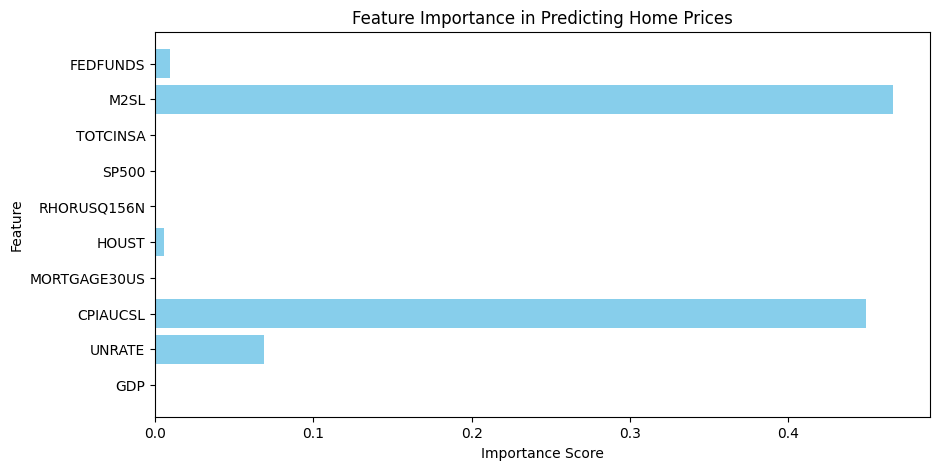

In [ ]:
import matplotlib.pyplot as plt


best_model = models["Random Forest"]
importance = best_model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(10, 5))
plt.barh(feature_names, importance, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Home Prices")
plt.show()


In [ ]:
import joblib

joblib.dump(best_model, "best_home_price_model.pkl")


['best_home_price_model.pkl']

In [ ]:

y_pred = best_model.predict(X_test)


results_df = pd.DataFrame({"Actual_HPI": y_test, "Predicted_HPI": y_pred})
results_df.to_csv("home_price_predictions.csv", index=False)
print("Predictions saved: home_price_predictions.csv")


Predictions saved: home_price_predictions.csv


In [ ]:
loaded_model = joblib.load("best_home_price_model.pkl")


In [ ]:
predictions = best_model.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": predictions}).to_csv("home_price_predictions.csv", index=False)


In [ ]:
predictions

array([185.31399, 151.88079, 193.57516, 149.06938, 148.79162, 207.42913,
       218.21363, 320.87202, 159.71635, 161.00015, 203.62027, 286.95812,
       294.2265 , 173.96625, 148.02135, 299.16139, 206.04151, 168.20909,
       161.24479, 181.9341 , 317.25156, 178.30699, 157.44075, 147.9893 ,
       205.67942, 178.30298, 161.37542, 161.84336, 183.75714, 302.48652,
       313.85049, 183.54854, 300.00215, 213.6459 , 180.60562, 165.14614,
       174.25591, 146.62717, 168.41788, 142.40921, 162.30605, 137.81879,
       143.9377 , 141.36333, 215.23931, 172.87218, 140.52878, 163.90853,
       206.68203, 183.18292, 201.95286])

## fine tuning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error


df = df2.copy()
X = df.drop(columns=["CSUSHPISA"])
y = df["CSUSHPISA"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}


rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

rf_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1)

rf_search.fit(X_train, y_train)
xgb_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

rf_pred = best_rf.predict(X_test)
xgb_pred = best_xgb.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

evaluate_model(y_test, rf_pred, "Random Forest (Tuned)")
evaluate_model(y_test, xgb_pred, "XGBoost (Tuned)")


Random Forest (Tuned): R² = 0.9971, RMSE = 2.8973
XGBoost (Tuned): R² = 0.9991, RMSE = 1.6388


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression


base_models = [
    ("Random Forest", best_rf),
    ("XGBoost", best_xgb)
]


stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression(), n_jobs=-1)


stacking_model.fit(X_train, y_train)


stacking_pred = stacking_model.predict(X_test)


evaluate_model(y_test, stacking_pred, "Stacked Model")


Stacked Model: R² = 0.9987, RMSE = 1.9253


In [ ]:
import joblib


joblib.dump(stacking_model, "stacked_home_price_model.pkl")


pd.DataFrame({"Actual": y_test, "Predicted": stacking_pred}).to_csv("stacked_home_price_predictions.csv", index=False)
